# Week Two - Multiple Linear Regression

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Vector Creation
Vectors are ordered arrays they can be of any data type but have to all be of the same type. In a maths setting a vector has a dimention of n thus runs from 1 to n, however in computing and python we will indexing from 0 to n - 1. Using this notation elements of a vectors are indexed using the vector the subscript postion of the element, for example: x<sub>i</sub>.

In [2]:
a = np.zeros(4); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {type(a)}")
a = np.zeros((4,)); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {type(a)}")
a = np.random.random_sample(4); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {type(a)}")

np.zeros(4) : a = [0. 0. 0. 0.], a.shape = (4,), a data type = <class 'numpy.ndarray'>
np.zeros(4) : a = [0. 0. 0. 0.], a.shape = (4,), a data type = <class 'numpy.ndarray'>
np.zeros(4) : a = [0.81975755 0.90951927 0.53978078 0.80513814], a.shape = (4,), a data type = <class 'numpy.ndarray'>


In [3]:
a = np.arange(4); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) : a = [0 1 2 3], a.shape = (4,), a data type = int32
np.zeros(4) : a = [0.74605884 0.78531105 0.44723257 0.16230821], a.shape = (4,), a data type = float64


In [4]:
a = np.array([5, 4, 3, 2]); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5., 3, 3, 2]); print(f"np.zeros(4) : a = {a}, a.shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) : a = [5 4 3 2], a.shape = (4,), a data type = int32
np.zeros(4) : a = [5. 3. 3. 2.], a.shape = (4,), a data type = float64


## Operations on Vectors

In [5]:
# Indexing.

a = np.arange(10)
print(a)

# Access an element.
print(f"a[2].shape = {a[2].shape}. a[2] = {a[2]}. Accessing an element returns a scalar.")

# Accessing the last element in the array.
print(f"a[-1] = {a[-1]}")

# Indexes must be within the acceptable range of the vector or an error will be returned.
try:
    b = a[10]
except Exception as e:
    print(e)

[0 1 2 3 4 5 6 7 8 9]
a[2].shape = (). a[2] = 2. Accessing an element returns a scalar.
a[-1] = 9
index 10 is out of bounds for axis 0 with size 10


In [6]:
# Slicing.

a = np.arange(10)
print(a)

# Accessing five conceutive elements (start:stop:step).
c = a[2:7:1]
print(f"a[2:7:1] = {c}")

# Accessing 3 elements step 2 (start:stop:step).
c = a[2:7:2]
print(f"a[2:7:2] = {c}")

# Access all elements index 3 and above.
c = a[3:]
print(f"a[3:] = {c}")

# Access all elements below index 3 excluding 3.
c = a[:3]
print(f"a[:3] = {c}")


# Access all elements.
c = a[:]
print(f"a[:] = {c}")


[0 1 2 3 4 5 6 7 8 9]
a[2:7:1] = [2 3 4 5 6]
a[2:7:2] = [2 4 6]
a[3:] = [3 4 5 6 7 8 9]
a[:3] = [0 1 2]
a[:] = [0 1 2 3 4 5 6 7 8 9]


In [7]:
# Single Vector Operations.

a = np.arange(5)
print(a)

# Negative elements of a.
print(-a)

# Summing all elements returns a scalar value.
print(np.sum(a))

# Finding the mean also returns a scalar value.
print(np.mean(a))

# Finding the square of every element.
print(a**2)

[0 1 2 3 4]
[ 0 -1 -2 -3 -4]
10
2.0
[ 0  1  4  9 16]


In [8]:
# Vector Vector Operations (Element-wise Operations)

# Element-wise addition.
a = np.array([1, 2, 3, 4])
b = np.array([-1, -2, 3, 4])
print(f"Binary operators work element wise a+b: {a+b}")

c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print(e)

Binary operators work element wise a+b: [0 0 6 8]
operands could not be broadcast together with shapes (4,) (2,) 


In [9]:
# Scalar Vector Operations - Vectors can be scaled by a number using *.
a = np.arange(10)
b = a * 2
print(f"a * 2 = {b}")

a * 2 = [ 0  2  4  6  8 10 12 14 16 18]


In [10]:
# Vector Vector Dot Product.
# The dot product multiplies the values in two vectors element-wise and then sums the result.
# Vector dot product requires the dimensions of the two vectors to be the same. 

# Using a for loop to perform vector vector dot product. Assuming a and b are the same dimention.

def my_dot_product(a, b):
    """
    Computes the dot product of two vectors of the same dimention.
    Args:
     - a - np array (n, ): representing our input vector.
     - b - np array (n, ): representing our weights in linear regression.
    Returns:
     - x - Scalar value.
    """
    x = 0
    for i in range(a.shape[0]):
        x += a[i] * b[i]
    
    return x

In [11]:
# Tesing For Loop Vector Vector Dot Product.
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])

print(f"my_dot_product(a, b) = {my_dot_product(a,b)}")

my_dot_product(a, b) = 24


In [12]:
# Performing the same dot product but with np.dot.
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)

print(f"np.dot(a, b) = {c}")

np.dot(a, b) = 24


## Computation Speed: Loop Vs Vector

In [13]:
import time

In [14]:
# Create two very large arrays.
np.random.seed(1)
a = np.random.rand(10000000)
b = np.random.rand(10000000)

# Capture time for np.dot
tic = time.time()
c = np.dot(a, b)
toc = time.time()

print(f"np.(a, b) = {c}")
print(f"Time taken to compute = {1000 * (toc-tic)}")

# Capture time for my_dot_product
tic = time.time()
c = my_dot_product(a, b)
toc = time.time()

print(f"my_dot_product(a, b) = {c}")
print(f"Time taken to compute = {1000 * (toc-tic)}")

np.(a, b) = 2501072.581681312
Time taken to compute = 14.195442199707031
my_dot_product(a, b) = 2501072.5816813707
Time taken to compute = 2660.5379581451416


## Matrices
It is common for input data (x_train) to come in the form of a vector of shape (m, ) of length m. Matrices are 2 dimentional arrays, index [m, n]. So a training set of data represented as a matrice is of length m and has n features. Thus w - our weights will come in the form of a 1 dimentional vector (n, ), representing one weight for each feature.

The same functions used to create 1D vectors can be used to create 2D matrices. Here are some examples:

In [15]:
a = np.zeros((1, 5))
print(f"a.shape = {a.shape}, a = {a}")

a = np.zeros((2, 1))
print(f"a.shape = {a.shape}, a = {a}")

a = np.random.random_sample((1, 1))
print(f"a.shape = {a.shape}, a = {a}")

a.shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a.shape = (2, 1), a = [[0.]
 [0.]]
a.shape = (1, 1), a = [[0.44236513]]


In [16]:
# One can also specify data. Dimentions are determined by the use of additional brackets matching the required format.
a = np.array([[5],[4],[3]])
print(f"a.shape = {a.shape}, a = {a}")

try: 
    print(a[0][0])
except Exception as e:
    print(e)

a.shape = (3, 1), a = [[5]
 [4]
 [3]]
5


## Operations on Matrices

In [17]:
# Indexing
a = np.array([[0, 1], [2, 3], [4, 5]])
print(f"a.shape = {a.shape} a = {a}")

# Accessing an element.
print(f"\na[2,0].shape =  {a[2, 0].shape} a[2,0] = {a[2, 0]} type(a[2,0]) = {type(a[2, 0])}")

# Accessing a row.
print(f"a[2].shape = {a[2].shape} a[2] = {a[2]} type(a[2]) = {type(a[2])}")

a.shape = (3, 2) a = [[0 1]
 [2 3]
 [4 5]]

a[2,0].shape =  () a[2,0] = 4 type(a[2,0]) = <class 'numpy.int32'>
a[2].shape = (2,) a[2] = [4 5] type(a[2]) = <class 'numpy.ndarray'>


In [18]:
# Reshaping
a = np.arange(10)
print(f"a = {a} a.reshape(5, -1) = {a.reshape(5, -1)}")

a = [0 1 2 3 4 5 6 7 8 9] a.reshape(5, -1) = [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [19]:
# Slicing
a = np.arange(20).reshape(-1, 10)
print(f"a = {a}")

# Access 5 consecutive elements (start:stop:step)
print(f"a[0, 2:7:1] = {a[0, 2:7:1]} a[0, 2:7:1].shape = {a[0, 2:7:1].shape}")

# access all elements
print(f"a[:,:] = {a[:,:]} a[:,:].shape = {a[:,:].shape}")

# access all elements in one row (very common usage)
print(f"a[1,:] = {a[1,:]}  a[1,:].shape = {a[1,:].shape}")

# The above is the same as.
print(f"a[1] = {a[1]} a[1].shape = {a[1].shape}")

a = [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
a[0, 2:7:1] = [2 3 4 5 6] a[0, 2:7:1].shape = (5,)
a[:,:] = [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] a[:,:].shape = (2, 10)
a[1,:] = [10 11 12 13 14 15 16 17 18 19]  a[1,:].shape = (10,)
a[1] = [10 11 12 13 14 15 16 17 18 19] a[1].shape = (10,)


## Problem Statement
We are going to yet again be using housing prices as a motivating factor in our problem. This time the dataset contains three examples, and four different features, these are - Size, Bedrooms, Floors, Age. Then again the label we are trying to predict is the continuous price value/ dependent variable.


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [20]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")

X_train.shape = (3, 4)
y_train.shape = (3,)


Since we are using multiple features this time w must be a vector representing one value for each feature in X_train, b however is still a scalar. We will select some inital values for w and b for the time being.

In [21]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init.shape = {w_init.shape}")
print(f"type(b_init) = {type(b_init)}")

w_init.shape = (4,)
type(b_init) = <class 'float'>


## Prediction Model with Multiple Variables

In [22]:
def lr_for_loop(x, w, b):
    """
    Computes linear regression model using multiple variables.
    Arguments:
     - X - The training features X_train, length m.
     - w - The weight.
     - b - The bias.
    Returns:
     - p - prediction
    """
    m = x.shape[0]
    p = 0
    for i in range(m):
        p_i = x[i] * w[i]
        p = p + p_i
    p += b
    
    return p

In [23]:
# Get a row from the data.
a = X_train[0, :]
print(f"First row = {a}")

# Get a prediction for this single row.
print(lr_for_loop(a, w_init, b_init))

First row = [2104    5    1   45]
459.9999976194083


In [24]:
# Single Prediction using np.dot. 

def np_lr(x, w, b):
    p = np.dot(w, x) + b
    return p

In [25]:
# Get a row from the data.
a = X_train[0, :]
print(f"First row = {a}")

# Get a prediction for this single row.
print(np_lr(a, w_init, b_init))

First row = [2104    5    1   45]
459.9999976194083


## Computing the cost for multiple variables
The cost function for multiple variables is exactly the same the only difference is how you calculate yhat, using vectors and matrices.

In [26]:
def cost_function(X, y, w, b):
    """
    Calculates the cost of the linear regression model.
    Arguments:
     - X - The training features X_train, length m, features n.
     - w - The weights (m ,)
     - b - The bias.
     - y - The actual y values assoicated with our input values X.
     Returns:
     - total_cost - The toal (error) cost of our function for the values we have used for w and b. 
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
            yHat = np.dot(X[i], w) + b
            cost = cost + (yHat - y[i]) ** 2
    total_cost = cost / (2 * m)
    return total_cost

In [27]:
# Computing cost
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
cost = cost_function(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w  = {cost}')

Cost at optimal w  = 1.5578904045996674e-12


## Gradient with Multiple Variables
To perform gradient descent with multiple variables I am going to use two for loops. The first for loop loops through all the examples then the second loop loops through all the features in that example.

In [28]:
def graident_function(X, y, w, b):
    """
    Computes the gradeint for linear regression.
    Arguments:
     - X - The training features X_train, length m, features n.
     - y - The actual y values assoicated with our input values X.
     - w - The weights (m, )
     - b - The bias.
    Returns:
     - gw - Gradient for paramater w.
     - gb - Gradient for paramater b.
    """
    m,n = X.shape
    gw = np.zeros((n,))
    gb = 0
    for i in range(m):
        error = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            gw[j] = gw[j] + error * X[i, j]
        gb = gb + error
    gb = gb / m
    gw = gw / m
    return gw, gb

In [29]:
# Compute and display gradient 
gw, gb = graident_function(X_train, y_train, w_init, b_init)
print(f'gb at initial w,b = {gb}')
print(f'gw at initial w,b =  {gw}')

gb at initial w,b = -1.6739251122999121e-06
gw at initial w,b =  [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


## Gradient Descent with Multiple Variables

In [30]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iter, cost_function, graident_function):
    """
    Performs batch gradient descent using the whole dataset in each iteration. Update w and b by taking num_iterations gradient 
    steps in the right direction size of learning rate alpha.
    Arguments:
     - X - The training features X_train, length m, features n.
     - y - The weights for our model, length n. 
     - b - The bias (scalar).
     - cost_function - The cost function returns the cost for the current values of w and b.
     - gradient_function - Computes the gradient of the cost for the current values of w and b.
     - alpha - The learning rate, 0.01 would be sensible.
     - num_iterations - The number of times we want to perform gradient  descent over the whole dataset (batch gradient descent)
    Returns:
     - w_optimal - A vector of w values length n, at optimal.
     - b_optimal - A scalar value for b, at optimal
    """
    # An array to store the cost history (we want this to decrese, implying that our model is diverging).
    cost_hist = []
    w = np.zeros(X.shape[1])
    b = b_init
    
    for i in range(num_iter):
        # Calculate the gradient.
        gw, gb = graident_function(X, y, w, b)
        
        w = w - alpha * gw 
        b = b - alpha * gb 
    
        if i < 100000:
            cost_hist.append(cost_function(X, y, w, b))
            
        # Print the cost 10 times.
        if i % math.ceil(num_iter / 10 ) == 0:
            print(f"Iteration: {i}, cost: {cost_hist[-1]}")
    print(f"Cost at optimal: {cost_hist[-1]} b = {w}, b = {b}.")
    
    return w, b, cost_hist

In [31]:
# Testing out gradient descent
w_start = np.zeros(X_train[1])
b_start = 0
iterations = 100000
alpha = 5.0e-7

w, b, cost = gradient_descent(X_train, y_train, w_start, b_start, alpha, iterations, cost_function, graident_function)


Iteration: 0, cost: 2529.4629522316304
Iteration: 10000, cost: 624.822259314153
Iteration: 20000, cost: 594.3333440477821
Iteration: 30000, cost: 581.0058048286584
Iteration: 40000, cost: 574.732192894754
Iteration: 50000, cost: 571.3591014150833
Iteration: 60000, cost: 569.1797876455938
Iteration: 70000, cost: 567.4929040444463
Iteration: 80000, cost: 566.0102450017911
Iteration: 90000, cost: 564.613375224772
Cost at optimal: 563.2537571994991 b = [ 0.24224154  0.28821169 -0.85520022 -1.57622854], b = -0.04168501764938912.


In [32]:
# Testing on the first example in training data, X_train[0] & y_train[0].

X_train_sample = X_train[0]

yHat_sample = np.dot(X_train_sample, w) + b
print(f"Models prediction after being trained with batch gradient descent: {yHat_sample:0.2f} compaired to the actual value of {y_train[0]}")

Models prediction after being trained with batch gradient descent: 439.29 compaired to the actual value of 460


## Feature Scaling
In this wee section we will look two different scaling techniques:
- Mean Normalization:
$$ Xnormalized = (X - μ) / (max(X) - min(X)) $$
Where:
- μ - is the mean of that value of that feature over the whole dataset.
- max(X) - is the max value of that variable.
- min(X) is the min value of that variable.

- Z-Score Normalization:
$$ X_normalized = (X - μ) / σ $$
Where: 
- μ - The mean value of that feature over the whole dataset.
- σ - The standard deviation of that feature

After z-score normalization the feature should have a mean of 0 and a standard deviation of 1. The mean and standard deviation can be calculated as shown:

$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [33]:
def z_score_normalization(X):
    """
    Computes z-score normalization column by column.
    Arguments:
     - X - (m, n) The training features X_train, length m, features n.
    Returns:
     - X_norm - (m, m)Input X normalized by column.
     - mu - (n, )The mean of each column.
     - sigma - (n, )The stadard deviation of each feature/ column.
    """
    # Get the mean of each column.
    mu = np.mean(X, axis = 0)
    
    # Get standard deviation of each column.
    sigma = np.std(X, axis = 0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm

# Feature Engineering and Polynomial Regression
Out of the box linear regression provides the means of building models in the form of:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b$$ 

However what if the features in the dataset are non linear. For example house prices do not tend to be linear with living space, rather they penalise very small or large houses. The answer to fit a non linear function to our data would be to use Polynomial Regression. Lets try fitting fitting a non linear curve. We will start with a simple quadratic: 
$$y = 1+x^2$$

In [34]:
# Creating target data
x = np.arange(0, 20)
y = 1 + x**2
X = x.reshape(-1, 1)

w_opt, b_opt, cost_hist = gradient_descent(X, y, 0, 0, 0.0001, 100000, cost_function, graident_function)

Iteration: 0, cost: 13861.913551829377
Iteration: 10000, cost: 696.0919762257288
Iteration: 20000, cost: 589.485096975472
Iteration: 30000, cost: 527.0671028928622
Iteration: 40000, cost: 490.52156274858027
Iteration: 50000, cost: 469.1242633949734
Iteration: 60000, cost: 456.596211604789
Iteration: 70000, cost: 449.26107649900695
Iteration: 80000, cost: 444.96637785622045
Iteration: 90000, cost: 442.4518452448416
Cost at optimal: 440.9797055947888 b = [18.6969951], b = -52.069472838986755.


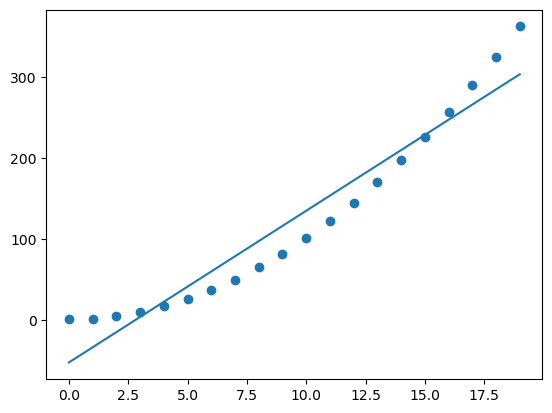

In [35]:
plt.scatter(x, y)
plt.plot(x, x * w_opt + b_opt)

As expected this linear model does not fit this non linear data well at all. Instead what we will have to do is use a polynomial feature such as: $$y= w_0x_0^2 + b$$

In [36]:
# Create target data again.
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features.
X = (x**2).reshape(-1, 1)
w_opt, b_opt, cost_hist = gradient_descent(X, y, 0, 0, 1e-5, 100000, cost_function, graident_function)

Iteration: 0, cost: 7329.218075123962
Iteration: 10000, cost: 0.20705710194933924
Iteration: 20000, cost: 0.1889390754645715
Iteration: 30000, cost: 0.1724064226791935
Iteration: 40000, cost: 0.15732041933596744
Iteration: 50000, cost: 0.14355447990530196
Iteration: 60000, cost: 0.13099309541549325
Iteration: 70000, cost: 0.11953086422556325
Iteration: 80000, cost: 0.10907160760795746
Iteration: 90000, cost: 0.09952756271998733
Cost at optimal: 0.09081947782252166 b = [1.00276498], b = 0.3701469979058437.


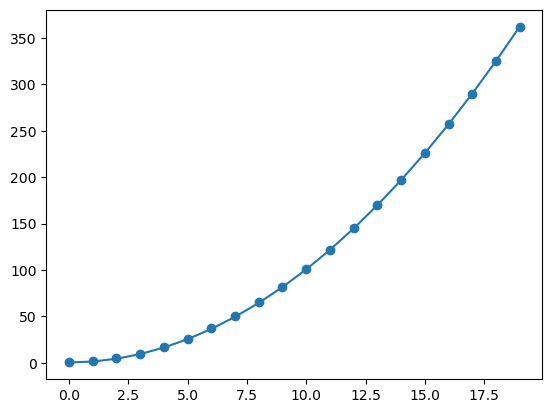

In [44]:
plt.scatter(x, y)
plt.plot(x, X * w_opt + b_opt)

## Selecting Features
Above we used a X^2 feature, however it might not be obvious what features are required. We have a variaty of potental features to try and find which is the most usefull, for example we could have tried:
$$y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$$